<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/8/8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.1 GMMを用いたクラスタリング
- 目的
    - GMMを用いてクラスタリングを行いk-meansで分類できないケースと比較
- 内容
    - シミュレーションデータを作成
    - k-meansを用いたクラスタリングの結果
    - GMMを用いたクラスタリングの結果

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, mixture

In [2]:
# シミュレーションデータの作成
# ２つのクラスタが近い位置に隣接するようにする
np.random.seed(2)
X1 = np.random.multivariate_normal([1, 0.25], [[0.07, 0], [0, 0.01]], 100)
X2 = np.random.multivariate_normal([1, 0.65], [[0.07, 0], [0, 0.01]], 100)
X3 = np.random.multivariate_normal([2, 1], [[0.01, 0], [0, 0.01]], 100)
Z = np.array([0] * 100 + [1] * 100 + [2] * 100)
X = np.concatenate([X1, X2, X3])

# データの正規化
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

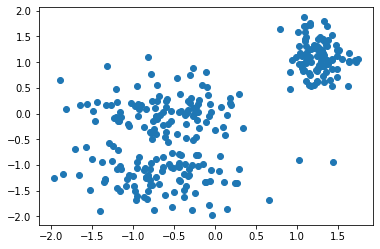

In [3]:
# データのプロット
plt.scatter(X_norm[:,0], X_norm[:,1])
plt.show()

In [4]:
# K-meansでクラスタリング
km=cluster.KMeans(n_clusters=3)
z_km=km.fit(X)

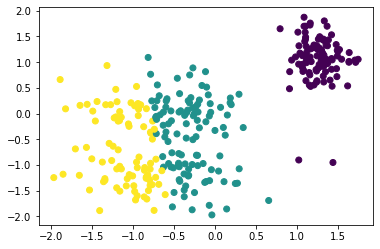

In [5]:
# クラスタリング結果の可視化
# k-meansはクラス内のデータが等方的に分散していることを前提としており、クラスが隣接していると誤ったクラスタを作りやすい
plt.scatter(x=X_norm[:,0], y=X_norm[:,1], c=z_km.labels_)
plt.show()

In [6]:
# GMMを用いたクラスタリング
gmm=mixture.GaussianMixture(n_components=3,covariance_type='full')
z_gmm=gmm.fit(X_norm)
z_gmm=z_gmm.predict(X_norm)

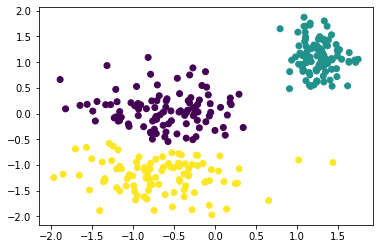

In [7]:
# GMMでは分布の形状も推論するため、k-meansよりも柔軟なクラスタリングが可能
plt.scatter(x=X_norm[:,0], y=X_norm[:,1], c=z_gmm)
plt.show()